In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load csv to df 
file = 'out/eval_log.csv'

df = pd.read_csv(file)
print(df.head())

    game_id  move_num player_to_move  max_time  increment  P1_elo  P2_elo  \
0  W8MZ0ZoK        14              B       120          1    1808    1760   
1  W8MZ0ZoK        15              W       120          1    1760    1808   
2  W8MZ0ZoK        15              B       120          1    1808    1760   
3  W8MZ0ZoK        16              W       120          1    1760    1808   
4  W8MZ0ZoK        16              B       120          1    1808    1760   

   P1_time  P2_time  P1_material_diff  P1_material_count  move_agreement  \
0      113      105               0.0               34.0           False   
1      105      102               0.0               34.0            True   
2      102      103               0.0               34.0            True   
3      103      100               0.0               34.0            True   
4      100       95               0.0               34.0           False   

   speed_agreement  origin_agreement  target_agreement  outcome_agreement  
0   

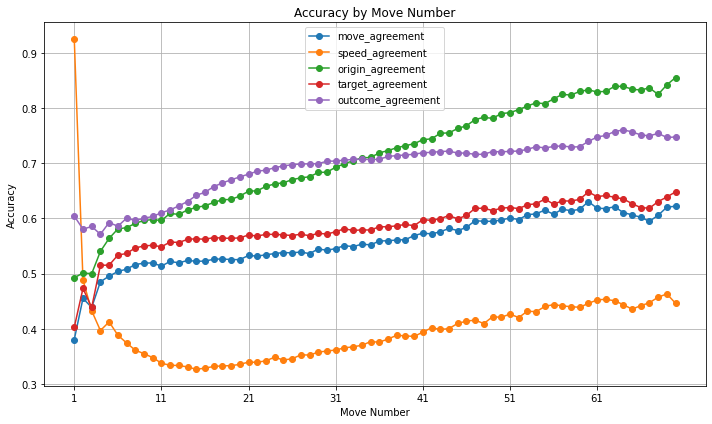

In [17]:
# List of agreement columns
agreement_columns = ['move_agreement', 'speed_agreement', 'origin_agreement', 'target_agreement', 'outcome_agreement']

# Calculate accuracy per move number
accuracy_by_move = df.groupby('move_num')[agreement_columns].mean()

# Filter data to include only move numbers up to 50
accuracy_by_move = accuracy_by_move[accuracy_by_move.index <= 70]

# Plotting all lines on a single graph
plt.figure(figsize=(10, 6))
for column in agreement_columns:
    plt.plot(accuracy_by_move.index, accuracy_by_move[column], marker='o', linestyle='-', label=column)
plt.title('Accuracy by Move Number')
plt.xlabel('Move Number')
plt.ylabel('Accuracy')
plt.xticks(accuracy_by_move.index[::10])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


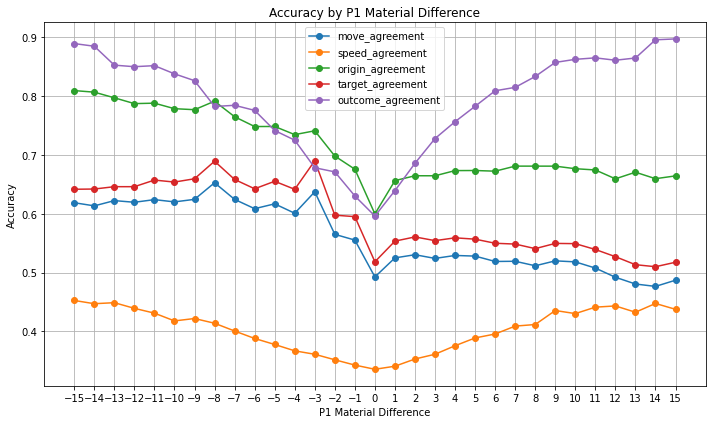

In [13]:
# Calculate accuracy per P1 material difference
accuracy_by_material_diff = df.groupby('P1_material_diff')[agreement_columns].mean()

# Filter data to include only P1 material differences between -15 and +15
accuracy_by_material_diff = accuracy_by_material_diff[(accuracy_by_material_diff.index >= -15) & (accuracy_by_material_diff.index <= 15)]


# Plotting all lines on a single graph
plt.figure(figsize=(10, 6))
for column in agreement_columns:
    plt.plot(accuracy_by_material_diff.index, accuracy_by_material_diff[column], marker='o', linestyle='-', label=column)
plt.title('Accuracy by P1 Material Difference')
plt.xlabel('P1 Material Difference')
plt.ylabel('Accuracy')
plt.xticks(accuracy_by_material_diff.index)  # Use all material difference values as x-ticks
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

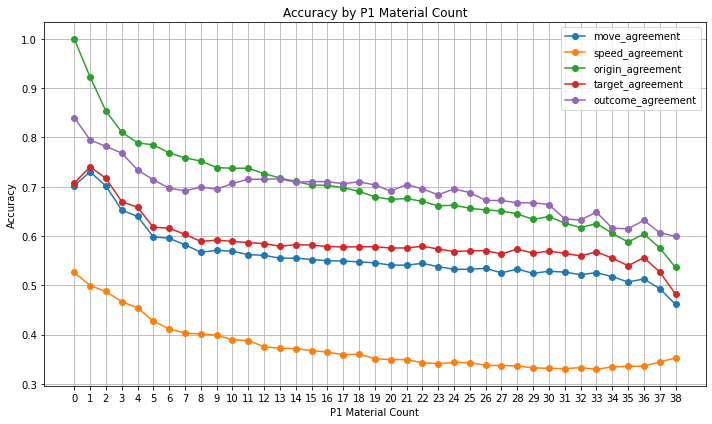

In [30]:
# Calculate accuracy per P1 material difference
accuracy_by_material_diff = df.groupby('P1_material_count')[agreement_columns].mean()

# Filter data to include only P1 material differences between -15 and +15
accuracy_by_material_diff = accuracy_by_material_diff[(accuracy_by_material_diff.index <= 38)]


# Plotting all lines on a single graph
plt.figure(figsize=(10, 6))
for column in agreement_columns:
    plt.plot(accuracy_by_material_diff.index, accuracy_by_material_diff[column], marker='o', linestyle='-', label=column)
plt.title('Accuracy by P1 Material Count')
plt.xlabel('P1 Material Count')
plt.ylabel('Accuracy')
plt.xticks(accuracy_by_material_diff.index)  # Use all material difference values as x-ticks
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

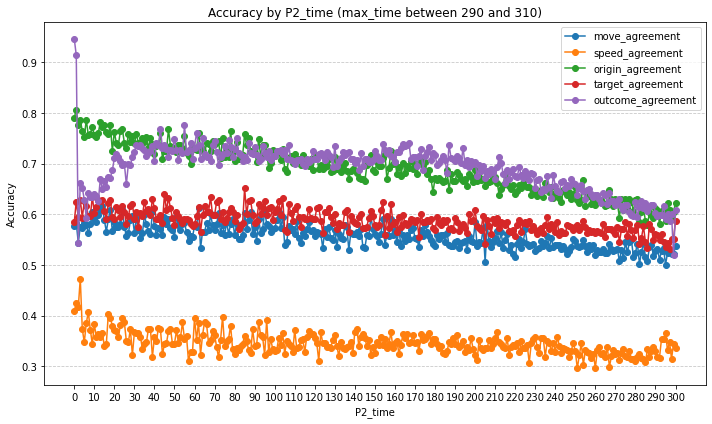

In [47]:
s = 'P2_time'
filtered_df = df[(df['max_time'] >= 290) & (df['max_time'] <= 310)]
accuracy_by_time = filtered_df.groupby(s)[agreement_columns].mean()
accuracy_by_time = accuracy_by_time[accuracy_by_time.index <= 300]

# Plotting all accuracy measures on a single line plot
plt.figure(figsize=(10, 6))
for column in agreement_columns:
    plt.plot(accuracy_by_time.index.astype(str), accuracy_by_time[column], marker='o', linestyle='-', label=column)
plt.title('Accuracy by ' + s + ' (max_time between 290 and 310)')
plt.xlabel(s)
plt.ylabel('Accuracy')
plt.xticks(accuracy_by_time.index[::10])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


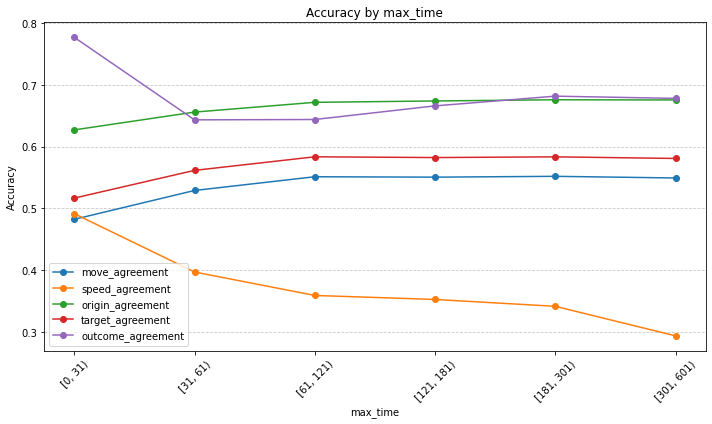

In [29]:
# Bin P1 material differences into ranges of 2
s = 'max_time'
bin_edges = [0, 31, 61, 121, 181, 301, 601]
df[s + '_bin'] = pd.cut(df[s], bins=bin_edges, right=False)

# Calculate accuracy per material difference bin
accuracy_by_bin = df.groupby(s + '_bin')[agreement_columns].mean()

# Plotting all accuracy measures on a single line plot
plt.figure(figsize=(10, 6))
for column in agreement_columns:
    plt.plot(accuracy_by_bin.index.astype(str), accuracy_by_bin[column], marker='o', linestyle='-', label=column)
plt.title('Accuracy by ' + s)
plt.xlabel(s)
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
